In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split

# load data

In [3]:
data_for_model = pd.read_csv('data_for_model.csv')

In [4]:
data_for_model.head()

,Unnamed: 0,dog_summa_nt,grace_period,prc_rate,stupen_cred,sum_admin_prc_nt,group_credit,Аннуитетный,Комбинированный,Простой,...,Стоимость сельхоз техники,Уборка будущего урожая,collateral amount,duration of contract,contract is expired,Days till the end,dolya zaloga,sex,type,age
0,0,57100.0,0,42.6,1,0.0,0,0,1,0,...,0.0,0.0,1.0,684,0,199,2.62697,1,1,48
1,1,5000.0,0,42.0,4,50.0,1,1,0,0,...,0.0,0.0,0.0,63,0,667,0.00000,1,1,50
2,2,5000.0,0,42.0,3,50.0,0,1,0,0,...,0.0,0.0,0.0,13,0,354,0.00000,0,1,45
3,3,8000.0,0,46.0,6,10.0,0,1,0,0,...,0.0,0.0,0.0,273,0,458,0.00000,0,1,40
4,4,8000.0,0,46.0,6,10.0,0,1,0,0,...,0.0,0.0,0.0,304,0,427,0.00000,0,1,40


In [5]:
data_for_model.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76870 entries, 0 to 76869
Data columns (total 63 columns):
dog_summa_nt                     76870 non-null float64
grace_period                     76870 non-null int64
prc_rate                         76870 non-null float64
stupen_cred                      76870 non-null int64
sum_admin_prc_nt                 76870 non-null float64
group_credit                     76870 non-null int64
Аннуитетный                      76870 non-null int64
Комбинированный                  76870 non-null int64
Простой                          76870 non-null int64
RUB                              76870 non-null int64
TJS                              76870 non-null int64
USD                              76870 non-null int64
kind of credit livestock         76870 non-null int64
kind of credit micro_agro        76870 non-null int64
kind of credit any_day           76870 non-null int64
kind of credit micro-business    76870 non-null int64
kind of credit chemic

# Preprocessing

In [7]:
#Prepayment account_RUB delete
data_for_model = data_for_model.drop(['Prepayment account_RUB', 'Prepayment account_TJS', 'Prepayment account_USD'], axis=1)

In [8]:
X = data_for_model.drop(['target'], axis=1)
y = data_for_model['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Model

In [155]:
model = RandomForestRegressor(n_estimators=600, min_samples_split=2, min_samples_leaf=2, 
                              max_features='sqrt', max_depth=110, bootstrap=False)

In [156]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=110,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [157]:
y_pred = model.predict(X_test)

In [158]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE", mean_absolute_error(y_test, y_pred))
print("R2", r2_score(y_test, y_pred))

RMSE 16.341310590767907
MAE 1.521897726990003
R2 0.859133701577221


In [146]:
from sklearn.externals import joblib
joblib.dump(model, 'RFR1(13.1).pkl')

['RFR1(13.1).pkl']

# Predict on data that have no target (it has not 0 value on last observing day)

In [100]:
doubt_df = pd.read_csv('doubt_data_for_model.csv')
doubt_df_true = pd.read_csv('doubt_data_final.csv')

In [101]:
doubt_df = doubt_df.drop(['Prepayment account_RUB', 'Prepayment account_TJS', 'Prepayment account_USD'], axis=1)
doubt_df_true = doubt_df_true.drop(['Prepayment account_RUB', 'Prepayment account_TJS', 'Prepayment account_USD'], axis=1)

In [102]:
doubt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 59 columns):
dog_summa_nt                     936 non-null float64
grace_period                     936 non-null int64
prc_rate                         936 non-null float64
stupen_cred                      936 non-null int64
sum_admin_prc_nt                 936 non-null float64
group_credit                     936 non-null int64
Аннуитетный                      936 non-null int64
Комбинированный                  936 non-null int64
Простой                          936 non-null int64
RUB                              936 non-null int64
TJS                              936 non-null int64
USD                              936 non-null int64
kind of credit livestock         936 non-null int64
kind of credit micro_agro        936 non-null int64
kind of credit any_day           936 non-null int64
kind of credit micro-business    936 non-null int64
kind of credit chemicals         936 non-null int64
kind 

In [103]:
y_pred_doubt = model.predict(doubt_df)

In [104]:
y_pred_doubt = pd.DataFrame(y_pred_doubt)

In [106]:
y_pred_doubt.describe()

,0
count,936.000000
mean,23.372436
std,101.658489
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,664.400000


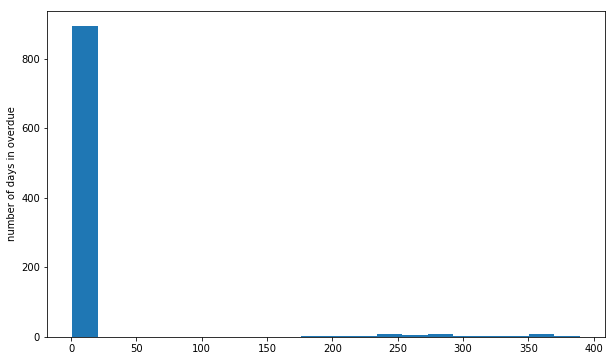

In [46]:
plt.figure(figsize=(10,6))
plt.hist(y_pred_doubt[0], bins= 20)
plt.ylabel('number of contracts')
plt.ylabel('number of days in overdue')
#plt.title('contracts without targets')
plt.show()

Text(0,0.5,'predicted overdue days')

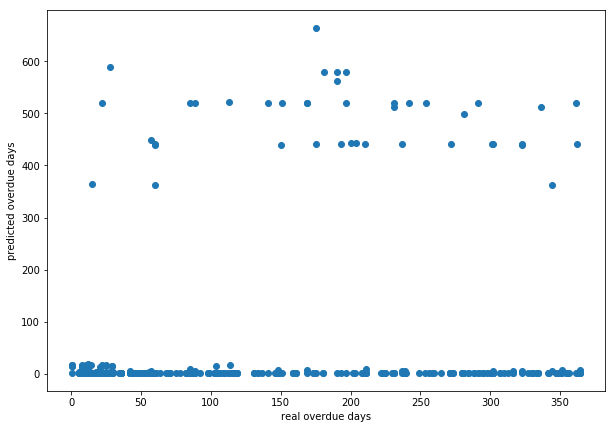

In [107]:
#doubt_df_true['overdue_day']
plt.figure(figsize=(10,7))
plt.scatter(doubt_df_true['overdue_day'], y_pred_doubt[0])
plt.xlabel('real overdue days')
plt.ylabel('predicted overdue days')

# Separate model for clients without collaterals

In [160]:
DFwoutc = data_for_model.loc[X['summa zaloga'] == 0]
DFwc = data_for_model.loc[X['summa zaloga'] != 0]
print(DFwoutc.shape)
print(DFwc.shape)

(60927, 60)
(15943, 60)


In [161]:
Xwoutc = DFwoutc.drop(['target'], axis=1)
Xwoutc = DFwoutc.drop(['summa zaloga', 'Вспомогательное оборудование', 'Гарантия', 
                       'Гарантия резервных товаров', 'Денежные средства', 'Драгоценные металлы', 
                       'Имущество ответственности', 'Крупно-рогатый скот', 'Недвижимость', 
                       'Поручитель','Сберегательный депозит', 'Стоимость сельхоз техники', 
                       'Уборка будущего урожая', 'collateral amount'], axis=1)
ywoutc = DFwoutc['target']
Xwc = DFwc.drop(['target'], axis=1)
ywc = DFwc['target']

## df without collaterals

In [162]:
X_train_woutc, X_test_woutc, y_train_woutc, y_test_woutc = train_test_split(Xwoutc, ywoutc, test_size=0.3, random_state=0)

In [163]:
model_woutc = RandomForestRegressor()
model_woutc.fit(X_train_woutc, y_train_woutc)
y_pred_woutc = model_woutc.predict(X_test_woutc)
print("RMSE_woutc", np.sqrt(mean_squared_error(y_test_woutc, y_pred_woutc)))
print("MAE_woutc", mean_absolute_error(y_test_woutc, y_pred_woutc))
print("R2_woutc", r2_score(y_test_woutc, y_pred_woutc))

RMSE_woutc 0.24168993985176243
MAE_woutc 0.0062749603369987505
R2_woutc 0.9999411151728432


Text(0,0.5,'predicted overdue days')

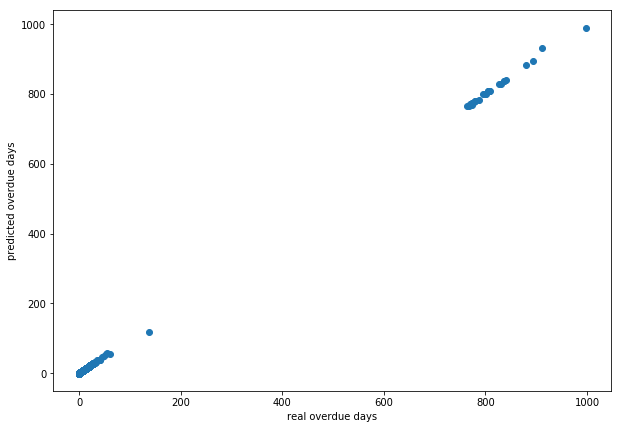

In [164]:
plt.figure(figsize=(10,7))
plt.scatter(y_test_woutc, y_pred_woutc)
plt.xlabel('real overdue days')
plt.ylabel('predicted overdue days')

## df with collaterals

In [165]:
X_train_wc, X_test_wc, y_train_wc, y_test_wc = train_test_split(Xwc, ywc, test_size=0.3, random_state=0)

In [166]:
model_wc = RandomForestRegressor()
model_wc.fit(X_train_wc, y_train_wc)
y_pred_wc = model_wc.predict(X_test_wc)
print("RMSE_wc", np.sqrt(mean_squared_error(y_test_wc, y_pred_wc)))
print("MAE_wc", mean_absolute_error(y_test_wc, y_pred_wc))
print("R2_wc", r2_score(y_test_wc, y_pred_wc))

RMSE_wc 25.149417257175095
MAE_wc 2.4809533765419194
R2_wc 0.8295331149006047


Text(0,0.5,'predicted overdue days')

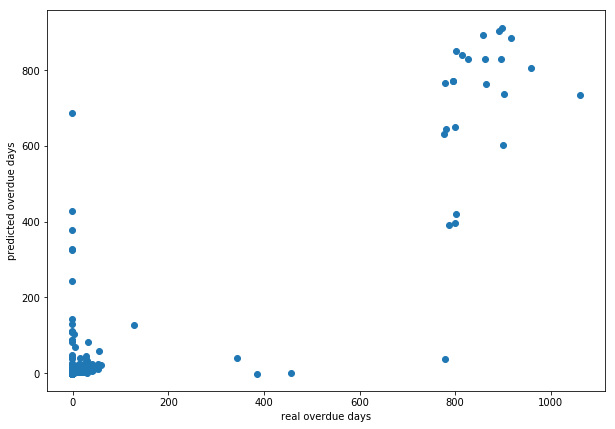

In [168]:
plt.figure(figsize=(10,7))
plt.scatter(y_test_wc, y_pred_wc)
plt.xlabel('real overdue days')
plt.ylabel('predicted overdue days')

## Dataset with collaterals but with the general model

In [171]:
y_pred_wc_gen = model.predict(X_test_wc)

In [172]:
print("RMSE_wc", np.sqrt(mean_squared_error(y_test_wc, y_pred_wc_gen)))
print("MAE_wc", mean_absolute_error(y_test_wc, y_pred_wc_gen))
print("R2_wc", r2_score(y_test_wc, y_pred_wc_gen))

RMSE_wc 15.200900585430421
MAE_wc 1.6383203314179282
R2_wc 0.9377236988423857


# Delete all collaterals

In [64]:
Xx = data_for_model.drop(['target'], axis=1)
Xx = Xx.drop(['summa zaloga', 'Вспомогательное оборудование', 'Гарантия', 
                       'Гарантия резервных товаров', 'Денежные средства', 'Драгоценные металлы', 
                       'Имущество ответственности', 'Крупно-рогатый скот', 'Недвижимость', 
                       'Поручитель','Сберегательный депозит', 'Стоимость сельхоз техники', 
                       'Уборка будущего урожая', 'collateral amount'], axis=1)
yy = data_for_model['target']

In [65]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.3, random_state=0)

## model

In [67]:
modelx = RandomForestRegressor()
modelx.fit(Xx_train, yy_train)
yy_pred = modelx.predict(Xx_test)

In [68]:
print("RMSE", np.sqrt(mean_squared_error(yy_test, yy_pred)))
print("MAE", mean_absolute_error(yy_test, yy_pred))
print("R2", r2_score(yy_test, yy_pred))

RMSE 14.994280684071864
MAE 1.0699969645722216
R2 0.868214674140457


Text(0,0.5,'predicted overdue days')

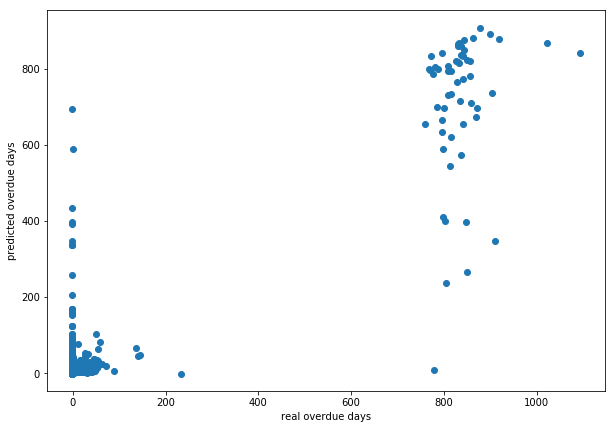

In [71]:
plt.figure(figsize=(10,7))
plt.scatter(yy_test, yy_pred)
plt.xlabel('real overdue days')
plt.ylabel('predicted overdue days')

# Feature importance

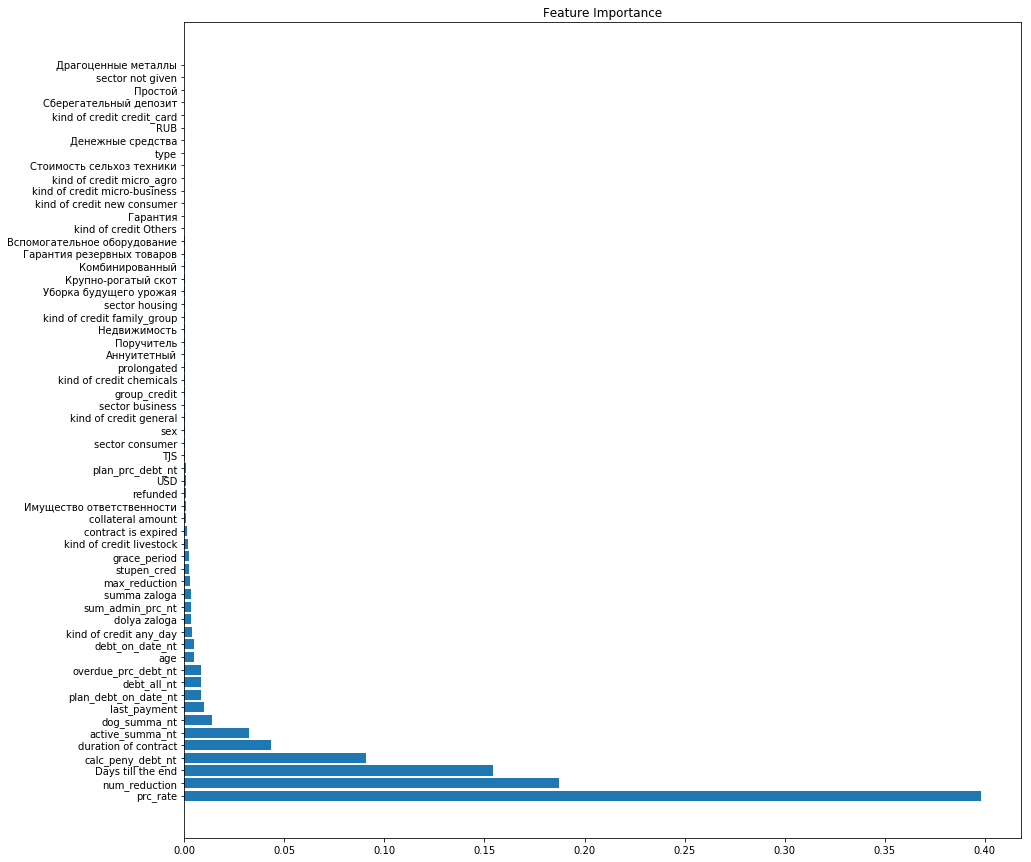

In [56]:
# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(15,15))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.yticks(range(X.shape[1]), names, rotation=0)

# Show plot
plt.show()

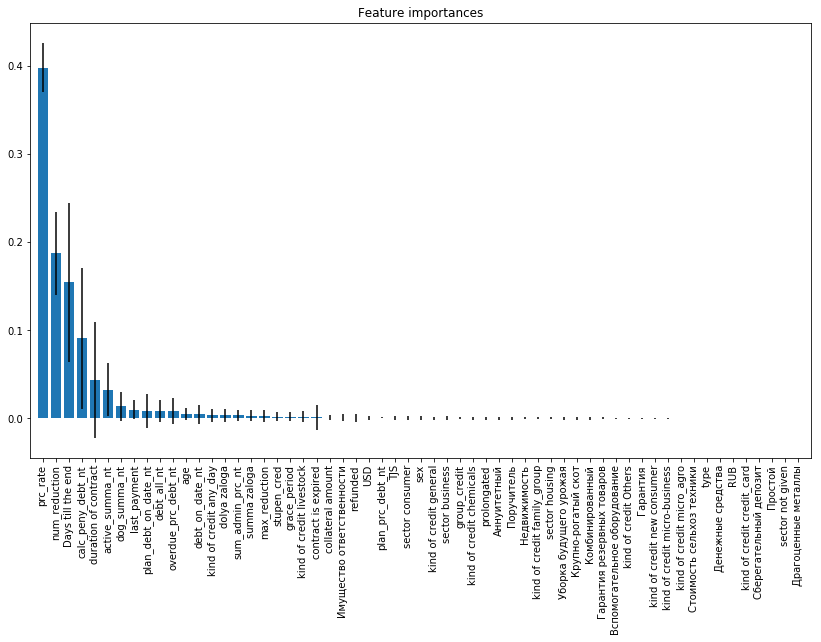

In [57]:
#Другой график 
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
plt.figure(1, figsize=(14, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Compare predict with true

In [108]:
y_t = pd.DataFrame(y_test).reset_index()
y_p = pd.DataFrame(y_pred)

In [109]:
y_t = y_t.drop(['index'], axis=1)

In [110]:
df_res = pd.concat([y_t, y_p], axis=1)
df_res.columns = ['y_test', 'y_pred']

In [111]:
df_res['diff']= df_res['y_test'] - df_res['y_pred']

In [62]:
df_res.to_csv('pred_data.csv', index=False)

## Plots

Text(0,0.5,'predicted overdue days')

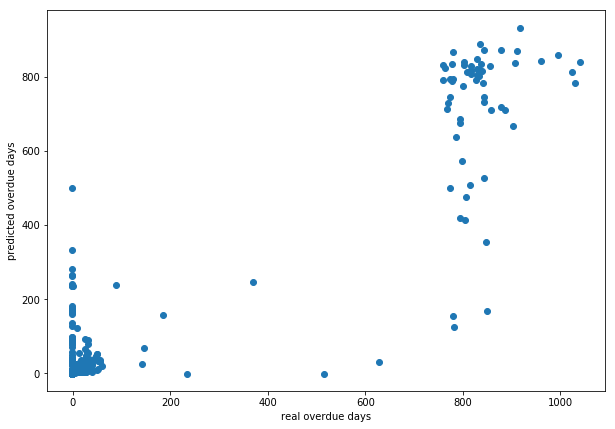

In [112]:
plt.figure(figsize=(10,7))
plt.scatter(df_res['y_test'], df_res['y_pred'])
plt.xlabel('real overdue days')
plt.ylabel('predicted overdue days')

# Tuning hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

In [ ]:
y_pred_RFR_RSCV = rf_random.predict(X_test)

In [ ]:
print(rf_random.best_params_)
'''OUT:{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 
     'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}'''

In [ ]:
my_submission = pd.DataFrame({'y_test': y_test, 
                              'y_pred': y_pred,
                              'y_pred_RandSearchCV': y_pred_RFR_RSCV,
                              'diff1': y_test - y_pred,
                              'diff2': y_test - y_pred_RFR_RSCV,
                              'diff1abs': np.abs(y_test - y_pred),
                              'diff2abs': np.abs(y_test - y_pred_RFR_RSCV)})
# you could use any filename. We choose submission here
my_submission.to_csv('RandomizedSearchCV.csv', index=False)